In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/kaggle/input/bias-dataset-custom/test.csv')
df.dropna(inplace=True)

# Read the CSV file using pandas
bilstmDf = pd.read_csv('/kaggle/input/predictions/test_with_predictions_decimals_bilstm_single.csv')
lstmDf = pd.read_csv('/kaggle/input/predictions/test_with_predictions_decimals_lstm_single.csv')
siambilstmDf = pd.read_csv('/kaggle/input/predictions/test_with_predictions_decimals_siamesebilstm_single.csv')

In [2]:
'''
smallbertDf['Target_pred']=smallbertDf['y_pred']
smallbertDf['Target']=smallbertDf['y_test']

bertDf['Target_pred']=bertDf['predicted_values']
'''

"\nsmallbertDf['Target_pred']=smallbertDf['y_pred']\nsmallbertDf['Target']=smallbertDf['y_test']\n\nbertDf['Target_pred']=bertDf['predicted_values']\n"

In [3]:
models=[lstmDf, bilstmDf, siambilstmDf]

In [4]:
for model in models:
    model['Target'] = df['toxicity']

In [5]:
mae, baf, bpr = [],[],[]
for model in models:
    
    print([k for k,v in locals().items() if v is model][0])
    
    # calculate the absolute difference between the two columns
    if not np.array_equal(model['Target_pred'].apply(lambda x: 0 if x < 0.5 else 1), model['Target'].apply(lambda x: 0 if x < 0.5 else 1)):
        model['Abs'] = abs(model['Target_pred'] - model['Target'])
        val = model['Abs'].mean()
        mae.append(val)
        print("Mean Absolute Mismatch Error: {:.2f}".format(val))

    # filter out rows where 'Target' is zero
    nonzero_df = model.loc[(model['Target'].apply(lambda x: 0 if x < 0.5 else 1) != 0)&(model['Target_pred'].apply(lambda x: 0 if x < 0.5 else 1) != 0)]
    # calculate the absolute ratio between the two columns for the remaining rows
    nonzero_df.loc[:, 'Ratio'] = nonzero_df['Target_pred'] / nonzero_df['Target']
    # calculate the average of the 'Ratio' column
    avg_ratio = nonzero_df['Ratio'].mean()
    
    baf.append(avg_ratio)

    # print the average ratio with proper formatting
    print("Bias Amplification Factor (for non-zero 'Target' values): {:.2f}".format(avg_ratio))
    
    
    model['Target_pred'] = model['Target_pred'].apply(lambda x: 0 if x < 0.5 else 1)
    model['Target'] = model['Target'].apply(lambda x: 0 if x < 0.5 else 1)
    
    # calculate the proportion of 1s in each column
    target_prop = model['Target'].sum() / len(model)
    target_pred_prop = model['Target_pred'].sum() / len(model)
    # print the results
    bpr.append(target_pred_prop/target_prop)
    print("Bias Proportion Ratio: {:.2f}".format(target_pred_prop/target_prop))
    
    print()

lstmDf
Mean Absolute Mismatch Error: 0.28


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Bias Amplification Factor (for non-zero 'Target' values): 1.18
Bias Proportion Ratio: 1.99

bilstmDf
Mean Absolute Mismatch Error: 0.28
Bias Amplification Factor (for non-zero 'Target' values): 1.16
Bias Proportion Ratio: 1.96

siambilstmDf
Mean Absolute Mismatch Error: 0.27
Bias Amplification Factor (for non-zero 'Target' values): 1.13
Bias Proportion Ratio: 1.58



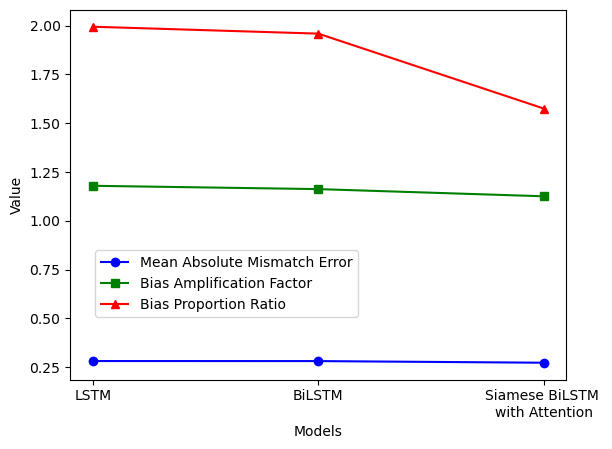

In [6]:
import matplotlib.pyplot as plt

modelnames = ['LSTM','BiLSTM','Siamese BiLSTM \nwith Attention']

# Create a line plot with multiple metrics
fig, ax = plt.subplots()
x_pos = [i for i, _ in enumerate(modelnames)]
ax.plot(x_pos, mae, color='blue', marker='o', label='Mean Absolute Mismatch Error')
ax.plot(x_pos, baf, color='green', marker='s', label='Bias Amplification Factor')
ax.plot(x_pos, bpr, color='red', marker='^', label='Bias Proportion Ratio')

# Add labels and title
ax.set_ylabel('Value')
ax.set_xlabel('Models')
ax.set_xticks(x_pos)
ax.set_xticklabels(modelnames)
plt.title('')

# Add a legend
plt.legend(bbox_to_anchor=(0.05, 0.35), loc='upper left', borderaxespad=0.)

# Save the plot as a PNG file
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

plt.show()

In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv('/kaggle/input/bias-dataset-custom/test.csv')
df.dropna(inplace=True)

# Read the CSV file using pandas
smallbertDf = pd.read_csv('/kaggle/input/predictions/test_with_predictions_smallbert_single.csv')
bertDf = pd.read_csv('/kaggle/input/predictions/test_with_predictions_bert_single.csv')
bilstmDf = pd.read_csv('/kaggle/input/predictions/test_with_predictions_decimals_bilstm_single.csv')
lstmDf = pd.read_csv('/kaggle/input/predictions/test_with_predictions_decimals_lstm_single.csv')
siambilstmDf = pd.read_csv('/kaggle/input/predictions/test_with_predictions_decimals_siamesebilstm_single.csv')

In [8]:
smallbertDf['Target_pred']=smallbertDf['y_pred']
smallbertDf['Target']=smallbertDf['y_test']

bertDf['Target_pred']=bertDf['predicted_values']

In [9]:
models=[lstmDf, bilstmDf, siambilstmDf, bertDf, smallbertDf]

In [10]:
for model in models:
    model['Target'] = df['toxicity']

In [11]:
accuracies = [0.7034, 0.7059, 0.7304, 0.83, 0.9551]
fpr, fnr = [],[]
for model in models:
    
    print([k for k,v in locals().items() if v is model][0])
    
    model['Target_pred'] = model['Target_pred'].apply(lambda x: 0 if x < 0.5 else 1)
    model['Target'] = model['Target'].apply(lambda x: 0 if x < 0.5 else 1)
    
    # Compute False Positive Rate
    acc = ((model['Target'] == 0) & (model['Target_pred'] == 1)).mean()
    fpr.append(acc)
    print("False Positive Rate: {:.2f}".format(acc))
    
    # Compute False Negative Rate
    acc = ((model['Target'] == 1) & (model['Target_pred'] == 0)).mean()
    fnr.append(acc)
    print("False Negative Rate: {:.2f}".format(acc))
    
    print()

lstmDf
False Positive Rate: 0.20
False Negative Rate: 0.09

bilstmDf
False Positive Rate: 0.20
False Negative Rate: 0.09

siambilstmDf
False Positive Rate: 0.16
False Negative Rate: 0.09

model
False Positive Rate: 0.23
False Negative Rate: 0.01

model
False Positive Rate: 0.47
False Negative Rate: 0.05



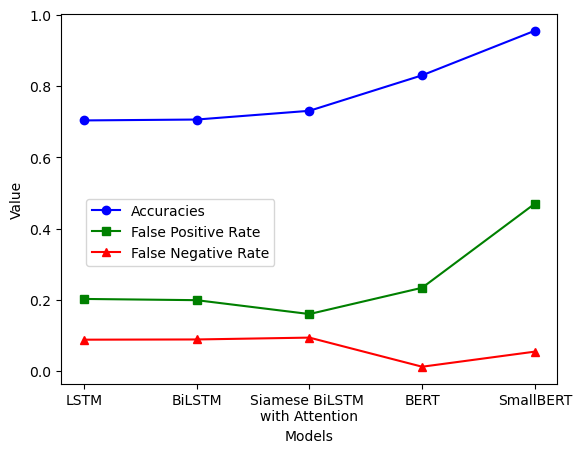

In [12]:
import matplotlib.pyplot as plt

modelnames = ['LSTM','BiLSTM','Siamese BiLSTM \nwith Attention', 'BERT', 'SmallBERT']

# Create a line plot with multiple metrics
fig, ax = plt.subplots()
x_pos = [i for i, _ in enumerate(modelnames)]
ax.plot(x_pos, accuracies, color='blue', marker='o', label='Accuracies')
ax.plot(x_pos, fpr, color='green', marker='s', label='False Positive Rate')
ax.plot(x_pos, fnr, color='red', marker='^', label='False Negative Rate')

# Add labels and title
ax.set_ylabel('Value')
ax.set_xlabel('Models')
ax.set_xticks(x_pos)
ax.set_xticklabels(modelnames)
plt.title('')

# Add a legend
plt.legend(bbox_to_anchor=(0.05, 0.5), loc='upper left', borderaxespad=0.)

# Save the plot as a PNG file
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

plt.show()